K-Means

1.Importing Required Libraries

In [90]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


2.Loading the Dataset

In [91]:
df = pd.read_csv("1632560262896716.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


3.Cleaning the Dataset

In [92]:
df = df.drop(['CustomerID'], axis=1)


In [93]:
df['Gender']=df['Gender'].replace({'Female': 0, 'Male': 1})


C:\Users\a.mohammadlou\AppData\Local\Temp\ipykernel_2080\2500753375.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df['Gender'].replace({'Female': 0, 'Male': 1})


In [94]:
df=df.rename(columns={'Annual Income (k$)': 'AI', 'Spending Score (1-100)':'SS'})


In [95]:
df['Gender'].value_counts()


Gender
0    112
1     88
Name: count, dtype: int64

In [96]:
df.value_counts()


Gender  Age  AI  SS
0       18   65  48    1
        19   63  54    1
             65  50    1
        20   16  6     1
             37  75    1
                      ..
1       67   62  59    1
        68   63  43    1
        69   44  46    1
        70   46  56    1
             49  55    1
Name: count, Length: 200, dtype: int64

In [97]:
df.columns = ['Gender', 'Age', 'AI', 'SS']
df.head()


,Gender,Age,AI,SS
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


4.Normalizing the Data

In [98]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df)


In [99]:
#X = df.values[:,1:]
#X = np.nan_to_num(X)



5.Applying KMeans Clustering

In [100]:
kmeans = KMeans(n_clusters=5, random_state=42, init='k-means++', n_init='auto').fit(data_normalized)
clusters = kmeans.fit_predict(data_normalized)
labels = kmeans.labels_



6.Adding Cluster Labels to the DataFrame

In [101]:
df["Clusters"] = labels


7.3D Scatter Plot of KMeans Clustering

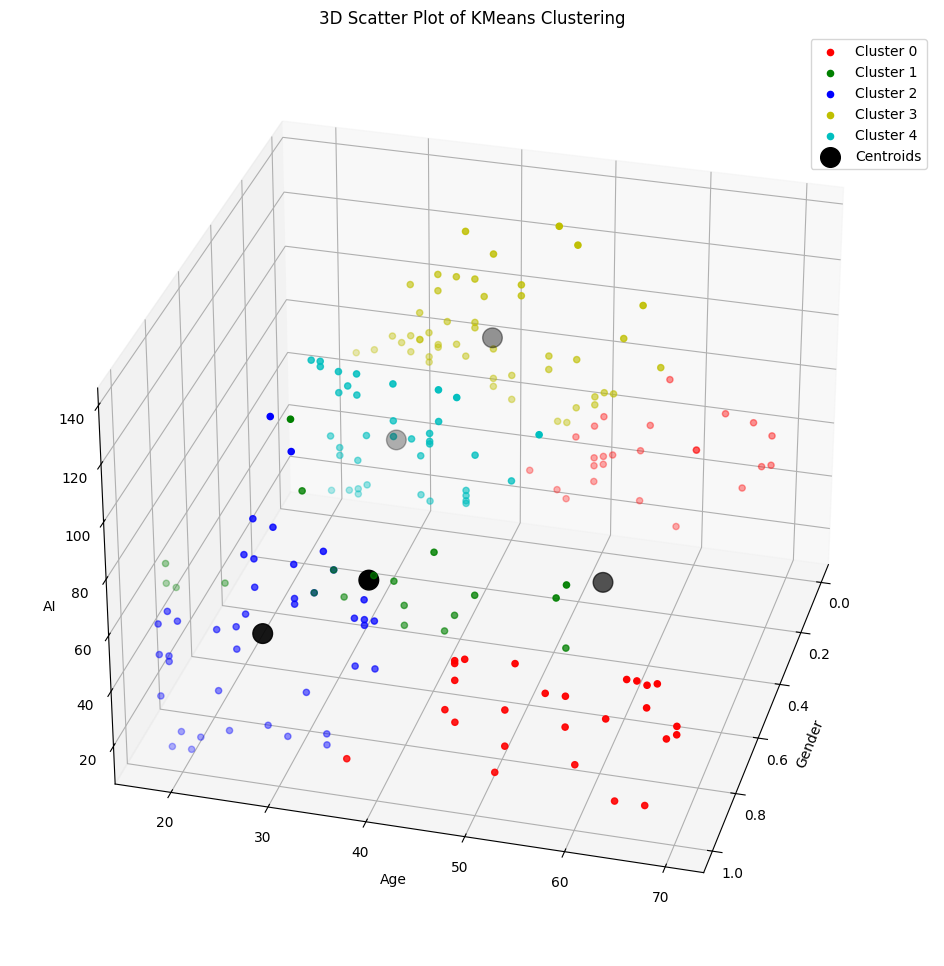

In [131]:
#Creating the 3D Scatter Plot
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

#Plotting the Data Points for Each Cluster
colors = ['r', 'g', 'b', 'y', 'c']
for cluster in range(5):
    X = df[df['Clusters'] == cluster]
    ax.scatter(X['Gender'],
               X['Age'],
               X['AI'],
               color = colors[cluster],
label = f'Cluster {cluster}')

#Plotting Cluster Centers
ceneters = scaler.inverse_transform(kmeans.cluster_centers_)
ax.scatter(ceneters[:, 0], ceneters[:, 1],ceneters[:, 2], c='k', s=200, label = 'Centroids')

#AX 3D View
ax.view_init(elev = 30, azim = 15)
    

#Adding Labels and Showing the Plot
plt.title('3D Scatter Plot of KMeans Clustering')
ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_zlabel('AI')
ax.legend()
plt.show()


Hierarchical

1.Import Required Libraries

In [158]:
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import seaborn as sns


2.Loading Data Set

In [159]:
print(df.head())


   Gender  Age  AI  SS  Clusters
0       1   19  15  39         2
1       1   21  15  81         2
2       0   20  16   6         3
3       0   23  16  77         3
4       0   31  17  40         3


3.Data Preprocessing

In [160]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
print(df_scaled[:5])


[[ 1.12815215 -1.42456879 -1.73899919 -0.43480148 -0.09037385]
 [ 1.12815215 -1.28103541 -1.73899919  1.19570407 -0.09037385]
 [-0.88640526 -1.3528021  -1.70082976 -1.71591298  1.03929925]
 [-0.88640526 -1.13750203 -1.70082976  1.04041783  1.03929925]
 [-0.88640526 -0.56336851 -1.66266033 -0.39597992  1.03929925]]


4.Perform Hierarchical Clustering

In [161]:
z = linkage(df_scaled, method = 'ward')


5.Visualize the Dendrogram

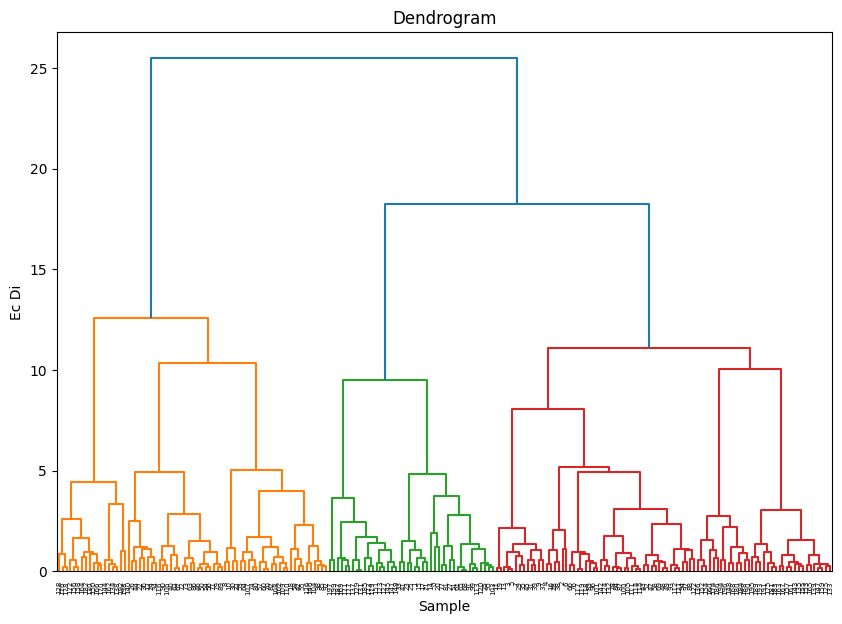

In [162]:
plt.figure(figsize=(10, 7))
dendrogram(z)
plt.title('Dendrogram')
plt.xlabel('Sample')
plt.ylabel('Ec Di')
plt.show()


6.Determine the Optimal Number of Clusters

In [163]:
clusters = fcluster(z, t=3, criterion = 'maxclust')
df['Clusters'] = clusters
print(df.head())


   Gender  Age  AI  SS  Clusters
0       1   19  15  39         2
1       1   21  15  81         2
2       0   20  16   6         3
3       0   23  16  77         3
4       0   31  17  40         3


7.Analyze the Clusters

In [164]:
cluster_summary = df.groupby('Clusters').mean()
print(cluster_summary)


            Gender        Age         AI         SS
Clusters                                           
1         0.642857  51.900000  57.628571  32.471429
2         1.000000  28.883721  59.953488  68.906977
3         0.000000  33.275862  63.218391  55.218391


8.Visualize the Clusters

In [165]:
plt.figure(figsize=(8, 6))
sns.scatterplot(df=df, x = df.columns[0], y = df.columns[1], hue='Clusters', palette='viridis')
plt.title('Hierarchical Clustering Visualizztion')
plt.show()


ValueError: Could not interpret value `Gender` for `x`. Value is a string, but `data` was not passed.

<Figure size 800x600 with 0 Axes>

In [166]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))
plt.figure(figsize=(16,14))
for color, label in zip(colors, cluster_labels):
    subset = df2[df2.cluster_ == label]
    for i in subset.index:
      plt.text(subset.Gender[i], subset.AI[i], str(subset['Age'][i]),rotation = 25)
      plt.scatter(subset.Gender, subset.AI, s= subset.AI*10, c=color, label='cluster'+str(label),alpha=0.5)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

NameError: name 'agglom' is not defined